In [6]:
import numpy as np
import pandas as pd

In [7]:
deliveries = pd.read_csv("deliveries.csv")

In [8]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [9]:
matches = pd.read_csv("matches.csv")

In [10]:
matches.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [11]:
matches.shape

(1024, 20)

In [12]:
deliveries.shape

(243817, 17)

In [13]:
total_score_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [14]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [16]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2065,1359544,1,197
2067,1370350,1,172
2069,1370351,1,182
2071,1370352,1,233


In [17]:
match_df = matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [18]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [19]:
teams = {'Royal Challengers Bangalore',
         'Kings XI Punjab',
         'Mumbai Indians',
         'Kolkata Knight Riders',
         'Rajasthan Royals',
         'Chennai Super Kings',
         'Sunrisers Hyderabad',
         'Delhi Capitals', 
         'Lucknow Super Giants', 
         'Gujarat Titans'
        }
    

In [24]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions','Gujarat Titans')

match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions','Gujarat Titans')

In [25]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [26]:
match_df.shape

(893, 22)

In [27]:
match_df.columns.tolist()

['id',
 'season',
 'city',
 'date',
 'match_type',
 'player_of_match',
 'venue',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'winner',
 'result',
 'result_margin',
 'target_runs',
 'target_overs',
 'super_over',
 'method',
 'umpire1',
 'umpire2',
 'match_id',
 'total_runs']

In [28]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [29]:
delivery_df = match_df.merge(deliveries,on = 'match_id')

In [30]:
delivery_df = delivery_df[delivery_df['inning']==2]

In [31]:
delivery_df.head(20)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
129,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,6,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
130,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,7,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
131,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,I Sharma,W Jaffer,0,0,0,NaN,1,R Dravid,bowled,NaN
132,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,V Kohli,I Sharma,W Jaffer,0,0,0,NaN,0,NaN,NaN,NaN
133,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,V Kohli,I Sharma,W Jaffer,0,4,4,legbyes,0,NaN,NaN,NaN


In [32]:
delivery_df['total_runs_y']= pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

In [33]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [34]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4


In [35]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [36]:
delivery_df['balls_left'] = 120 - (6*delivery_df['over']  + delivery_df['ball']) 

In [37]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,115


In [38]:
delivery_df['is_wicket'].unique()

array([0, 1], dtype=int64)

In [39]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == '0' else '1')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets_left'] = 10 - wickets


In [40]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,119,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,118,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,117,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,116,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,115,10


In [41]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,0,0,NaN,NaN,1,221,119,10,6.0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,wides,0,0,NaN,NaN,2,220,118,10,6.0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,0,0,NaN,NaN,2,220,117,10,4.0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,0,0,NaN,NaN,3,219,116,10,4.5
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,0,0,NaN,NaN,4,218,115,10,4.8


In [42]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,NaN,NaN,1,221,119,10,6.0,11.142857
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,NaN,NaN,2,220,118,10,6.0,11.186441
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,NaN,2,220,117,10,4.0,11.282051
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,NaN,NaN,3,219,116,10,4.5,11.327586
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,NaN,NaN,4,218,115,10,4.8,11.373913


In [43]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [44]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [45]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,NaN,NaN,1,221,119,10,6.0,11.142857,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,NaN,NaN,2,220,118,10,6.0,11.186441,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,NaN,2,220,117,10,4.0,11.282051,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,NaN,NaN,3,219,116,10,4.5,11.327586,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,NaN,NaN,4,218,115,10,4.8,11.373913,0


In [46]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [48]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,119,10,222,6.0,11.142857,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,118,10,222,6.0,11.186441,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,117,10,222,4.0,11.282051,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,116,10,222,4.5,11.327586,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,218,115,10,222,4.8,11.373913,0


In [49]:
final_df = final_df.sample(final_df.shape[0])

In [50]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
12688,Rajasthan Royals,Kings XI Punjab,Chandigarh,216,111,9,221,3.333333,11.675676,0
23346,Royal Challengers Bangalore,Chennai Super Kings,Durban,83,72,7,129,5.750000,6.916667,1
40639,Kolkata Knight Riders,Mumbai Indians,Kolkata,15,24,9,133,7.375000,3.750000,1
107035,Chennai Super Kings,Kings XI Punjab,Chandigarh,43,50,8,130,7.457143,5.160000,1
124731,Gujarat Lions,Royal Challengers Bangalore,Bangalore,31,55,8,134,9.507692,3.381818,1


In [51]:
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [52]:
final_df.dropna(inplace = True)

In [53]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000,96327.000000
mean,92.915642,62.987688,7.534502,166.393223,7.503628,10.390705,0.527132
std,50.192963,33.292063,2.147913,29.288859,2.311837,13.915475,0.499266
min,-16.000000,-2.000000,0.000000,62.000000,0.000000,-510.000000,0.000000
25%,53.000000,35.000000,6.000000,148.000000,6.315789,7.137931,0.000000
50%,92.000000,64.000000,8.000000,166.000000,7.545455,8.860465,1.000000
75%,130.000000,92.000000,9.000000,186.000000,8.761905,10.933333,1.000000
max,248.000000,119.000000,10.000000,248.000000,36.000000,708.000000,1.000000


In [54]:
final_df = final_df[final_df['balls_left'] !=0]

In [55]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [56]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
210290,Sunrisers Hyderabad,Gujarat Titans,Ahmedabad,159,94,6,188,6.692308,10.148936
209168,Rajasthan Royals,Kolkata Knight Riders,Kolkata,81,89,9,149,13.161290,5.460674
7535,Deccan Chargers,Kolkata Knight Riders,Hyderabad,33,5,3,204,8.921739,39.600000
80623,Chennai Super Kings,Mumbai Indians,Kolkata,107,71,4,148,5.020408,9.042254
191837,Delhi Capitals,Kolkata Knight Riders,Mumbai,53,43,5,146,7.246753,7.395349
...,...,...,...,...,...,...,...,...,...
77363,Kolkata Knight Riders,Royal Challengers Bangalore,Ranchi,81,82,8,115,5.368421,5.926829
98605,Rajasthan Royals,Chennai Super Kings,Ahmedabad,65,57,10,156,8.666667,6.842105
92167,Mumbai Indians,Kings XI Punjab,Chandigarh,6,13,7,156,8.411215,2.769231
149162,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,64,54,9,150,7.818182,7.111111


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

trf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city']),
        ('num', StandardScaler(), ['crr', 'rrr'])
    ], remainder='passthrough')

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [59]:
pipe = Pipeline(steps =[
    ('step1', trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [60]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('num', StandardScaler(),
                                                  ['crr', 'rrr'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [61]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
210290,Sunrisers Hyderabad,Gujarat Titans,Ahmedabad,159,94,6,188,6.692308,10.148936
209168,Rajasthan Royals,Kolkata Knight Riders,Kolkata,81,89,9,149,13.161290,5.460674
7535,Deccan Chargers,Kolkata Knight Riders,Hyderabad,33,5,3,204,8.921739,39.600000
80623,Chennai Super Kings,Mumbai Indians,Kolkata,107,71,4,148,5.020408,9.042254
191837,Delhi Capitals,Kolkata Knight Riders,Mumbai,53,43,5,146,7.246753,7.395349
...,...,...,...,...,...,...,...,...,...
77363,Kolkata Knight Riders,Royal Challengers Bangalore,Ranchi,81,82,8,115,5.368421,5.926829
98605,Rajasthan Royals,Chennai Super Kings,Ahmedabad,65,57,10,156,8.666667,6.842105
92167,Mumbai Indians,Kings XI Punjab,Chandigarh,6,13,7,156,8.411215,2.769231
149162,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,64,54,9,150,7.818182,7.111111


In [62]:
y_pred = pipe.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8128308938025537

In [64]:
pipe.predict_proba(X_test)[10]

array([0.97456175, 0.02543825])

In [77]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    


In [78]:
def match_progression(x_df, match_id, pipe):
    # Filter the DataFrame for the given match_id
    match = x_df[x_df['match_id'] == match_id]

    # Filter the match data to include only rows where the ball column equals 6
    match = match[(match['ball'] == 6)]

    # Print the columns and number of rows in the match DataFrame to debug
    print("Columns in match DataFrame:", match.columns)
    print("Number of rows in match DataFrame:", match.shape[0])

    # Check if match DataFrame is empty after filtering
    if match.empty:
        print(f"No data found for match_id {match_id} at the end of overs.")
        return None, None

    # Select specific columns and drop any rows with NaN values
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'crr', 'rrr']].dropna()

    # Print the number of rows in temp_df after dropping NaNs
    print("Number of rows in temp_df after dropping NaNs:", temp_df.shape[0])

    # Check if temp_df is empty after dropping NaNs
    if temp_df.empty:
        print(f"No valid data available after dropping NaNs for match_id {match_id}.")
        return None, None

    # Use the pipeline to predict probabilities
    result = pipe.predict_proba(temp_df)

    # Add predicted probabilities to temp_df
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)

    # Add end_of_over column
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # Extract target runs
    target = temp_df['total_runs_x'].values[0]

    # Calculate runs_after_over
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    # Calculate wickets_in_over
    wickets_left = list(temp_df['wickets_left'].values)
    new_wickets = wickets_left[:]
    new_wickets.insert(0, 10)
    wickets_left.append(0)
    w = np.array(wickets_left)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    # Print the target
    print("Target-", target)

    # Select specific columns to keep for the final output
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target




In [79]:

# Example usage
temp_df, target = match_progression(delivery_df, 335982, pipe)

if temp_df is not None:
    print(temp_df)
else:
    print("No data available for the specified match_id.")

Columns in match DataFrame: Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder',
       'current_score', 'runs_left', 'balls_left', 'wickets_left', 'crr',
       'rrr', 'result'],
      dtype='object')
Number of rows in match DataFrame: 15
Number of rows in temp_df after dropping NaNs: 15
Target- 222
     end_of_over  runs_after_over  wickets_in_over   lose  win
129            1                4                0   94.8  5.2
136            2                5                1   97.1  2.9
142            3                2                1   98.7  1.3
149            4                5                0   98.7  1.3
155            5                8                1   99.2  0.8
161            6                2                1   99.6  0.4
167            7    

Text(0.5, 1.0, 'Target-222')

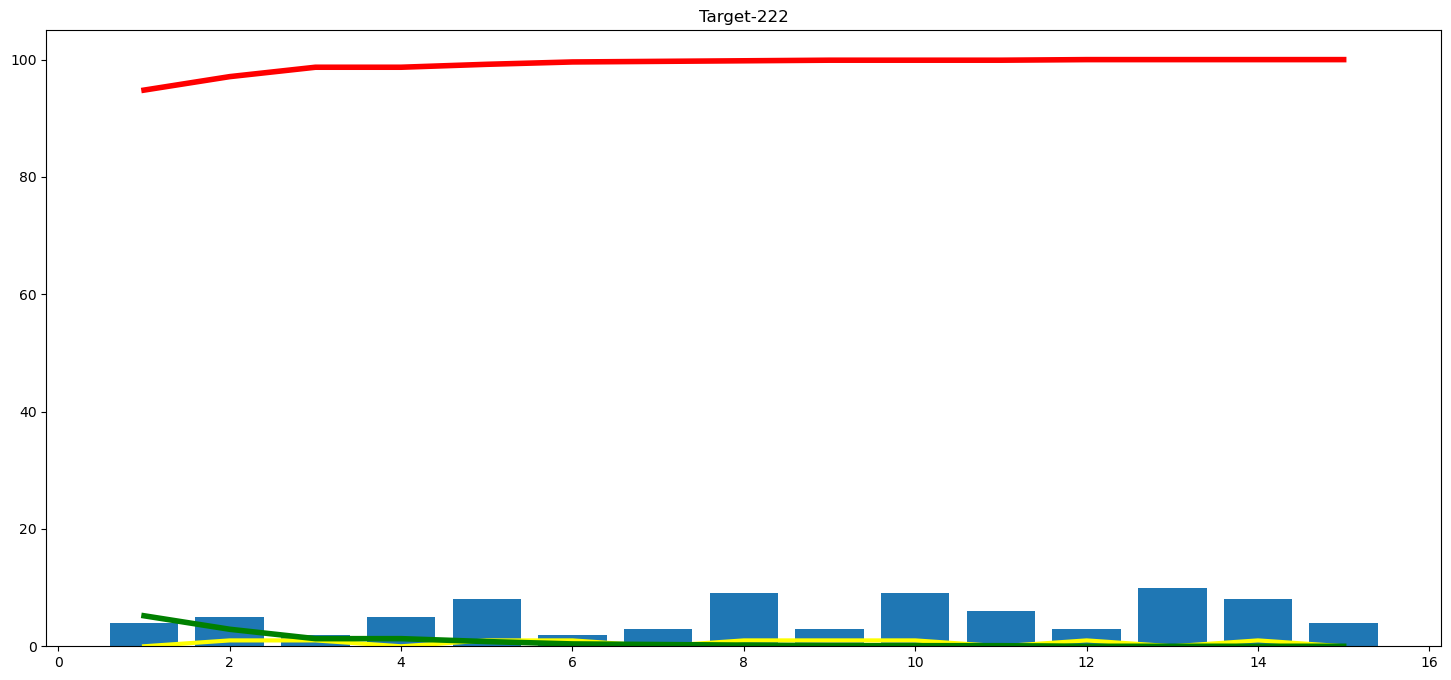

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [82]:
teams


{'Chennai Super Kings',
 'Delhi Capitals',
 'Gujarat Titans',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

In [83]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati'], dtype=object)

In [85]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))